In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Data Processing

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

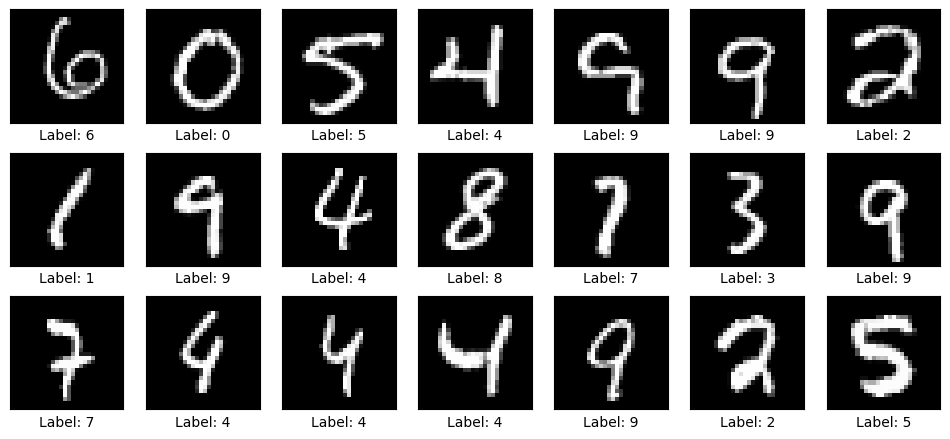

In [4]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(12,9))
for i, idx in enumerate(range(100, 121)):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap="grey")
    plt.xlabel(f"Label: {class_names[test_labels[idx]]}")
plt.show()

# Model

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 64)       

# Training

In [14]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels),
                    batch_size = 128)

Epoch 1/3


2023-11-09 15:48:55.861585: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 57s 122ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0551 - val_accuracy: 0.9824
Epoch 2/3
469/469 [==============================] - 53s 113ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0285 - val_accuracy: 0.9906
Epoch 3/3
469/469 [==============================] - 64s 137ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0336 - val_accuracy: 0.9882


# Plot accuracy graph

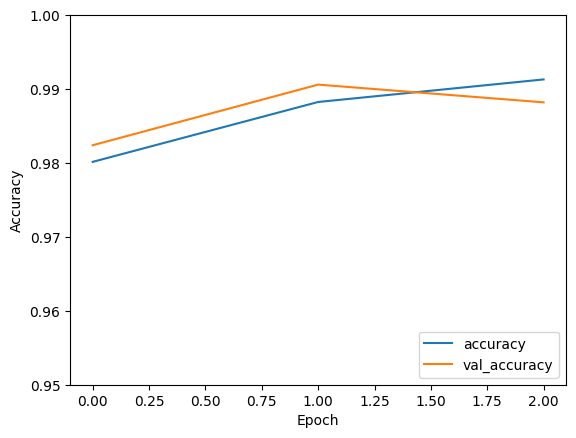

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.0336 - accuracy: 0.9882 - 2s/epoch - 8ms/step


In [20]:
print(test_acc)

0.9882000088691711


# Predictions

In [21]:
probs = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [28]:
probs[7].sum()

0.9999999

In [22]:
preds = np.array(tf.argmax(probs, axis=1))

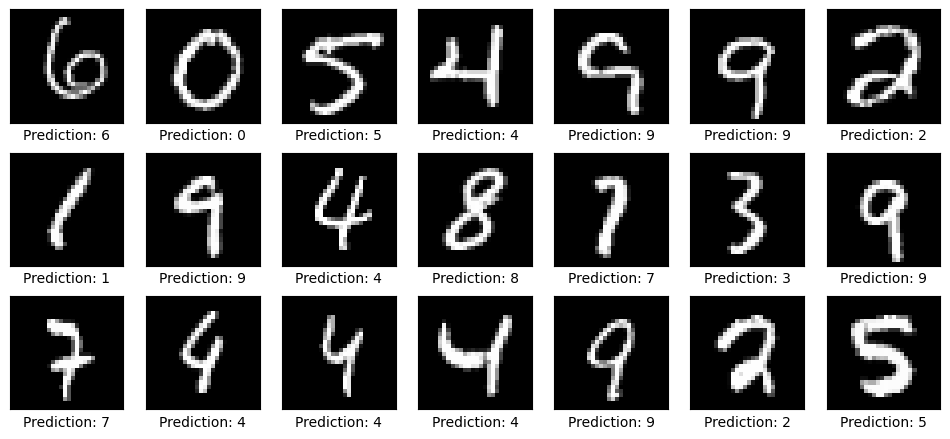

In [23]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(12,9))
for i, idx in enumerate(range(100, 121)):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap="grey")
    plt.xlabel(f"Prediction: {class_names[preds[idx]]}")
plt.show()